In [5]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
import hess.loss_surfaces as loss_surfaces
from hess.data import data_loader
import numpy as np
import sklearn.datasets as datasets
from hess.plotting import plot_decision_boundary

In [6]:
def twospirals(n_points, noise=.5, random_state=920):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [7]:
X, Y = twospirals(500, noise=1.5)

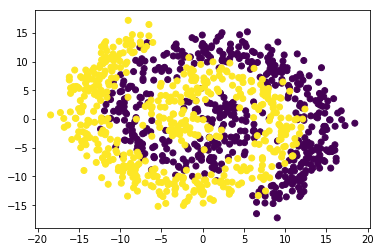

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [9]:
train_x = torch.FloatTensor(X)

In [10]:
train_y = torch.FloatTensor(Y).unsqueeze(-1)

In [11]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(2)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    train_x, train_y = train_x.cuda(), train_y.cuda()

In [100]:
depth_list = [1, 2, 4, 10]
width_list = [50, 50, 15, 50] 

In [101]:
for ii in range(len(depth_list)):
    optimus = Transformer(train_x, train_y, net=hess.nets.MoonNet, n_hidden=depth_list[ii], hidden_size=width_list[ii],
                     activation=torch.nn.ELU(), bias=True)
    
    if use_cuda:
        optimus = optimus.cuda()

    optimus.train_net(print_loss=False, lr=0.01, iters=4000,
             loss_func=torch.nn.BCEWithLogitsLoss())
    
    print("net ", ii, " done")
    
    fname = "spirals_" + str(ii) + ".pt"
    torch.save(optimus.net.state_dict(), "../hess/saved-models/" + fname)

net  0  done
net  1  done
net  2  done
net  3  done


In [91]:
fname = "spirals_" + str(ii) + ".pt"

In [22]:
optimus = Transformer(train_x, train_y, net=hess.nets.MoonNet, n_hidden=4, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [23]:
print(sum(p.numel() for p in optimus.net.parameters()))

1341


In [24]:
if use_cuda:
    optimus = optimus.cuda()

In [25]:
optimus.train_net(print_loss=True, lr=0.01, iters=1000,
                 loss_func=torch.nn.BCEWithLogitsLoss())

tensor(0.6932, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6408, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6105, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6135, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6131, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6038, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5993, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5975, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5946, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5923, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5912, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5882, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5832, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5799, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5786, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5756, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.2051, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2049, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2048, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2050, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2056, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2075, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2122, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2220, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2320, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2277, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2066, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2099, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2229, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2116, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2043, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2148, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1836, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1835, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1832, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1829, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1829, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1830, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1831, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1831, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1832, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1836, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1850, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1882, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1959, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2077, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2233, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.2138, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1797, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1800, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1798, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1793, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1796, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1792, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1791, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1791, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1788, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1788, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1787, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1785, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1784, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1783, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1781, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1781, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1733, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1737, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1728, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1732, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1724, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1728, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1720, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1725, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1717, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1721, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1713, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1718, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1711, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1715, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1708, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1712, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1738, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1710, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1725, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1719, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1706, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1715, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1697, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1703, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1698, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1694, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1695, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1685, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1686, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1679, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1681, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1679, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1650, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1815, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1671, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1742, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1660, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1697, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1675, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1641, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1679, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1643, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1649, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1629, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1651, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1617, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1628, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1630, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


In [26]:
optimus = optimus.cpu()

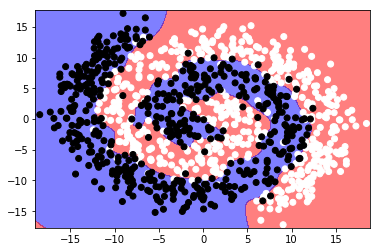

In [27]:
plot_decision_boundary(train_x, train_y, optimus, use_cuda=False,
                      buffer=0.5, h=0.1)